In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! kaggle datasets download niteshfre/chessman-image-dataset

 85% 49.0M/57.6M [00:00<00:00, 93.4MB/s]
100% 57.6M/57.6M [00:00<00:00, 90.0MB/s]


In [5]:
! unzip chessman-image-dataset.zip

Archive:  chessman-image-dataset.zip
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000013.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000015.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000016.jpg  
  i

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from sklearn.metrics import classification_report

In [8]:
image_size = (48,48)
batch = 32

# Split the dataset into training and validation data set:

train = keras.preprocessing.image_dataset_from_directory('Chessman-image-dataset/Chess/',
                                                         validation_split = 0.2,
                                                         subset = 'training',
                                                         seed = 42,
                                                         image_size = image_size,
                                                         batch_size = batch,
                                                         label_mode = 'categorical')


validation = keras.preprocessing.image_dataset_from_directory('Chessman-image-dataset/Chess/',
                                                              validation_split = 0.2,
                                                              subset= 'validation',
                                                              seed = 42,
                                                              image_size = image_size,
                                                              label_mode = 'categorical')



Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [12]:
def display_samples(dataset, n_samples, classes_name):
  plt.figure(figsize = (10,10))
  for images, labels in dataset.take(1):
    for i in range(n_samples):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(classes_name[np.argmax(labels[i])])
      plt.axis('off')

(48, 48, 3)


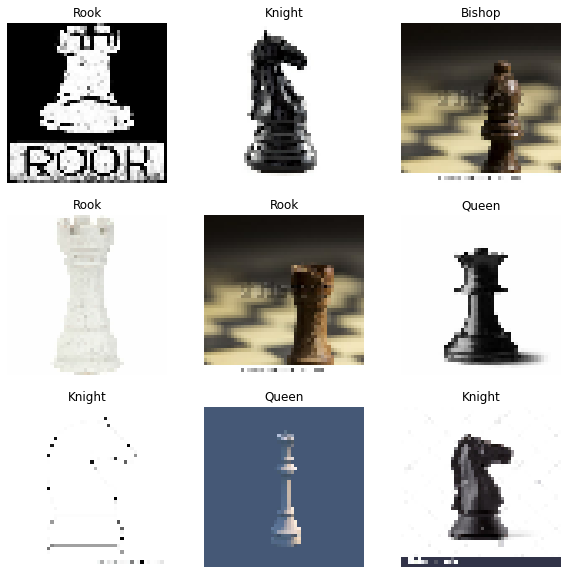

In [14]:
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

In [15]:
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)

In [16]:
counts

array([71, 62, 85, 83, 64, 77])

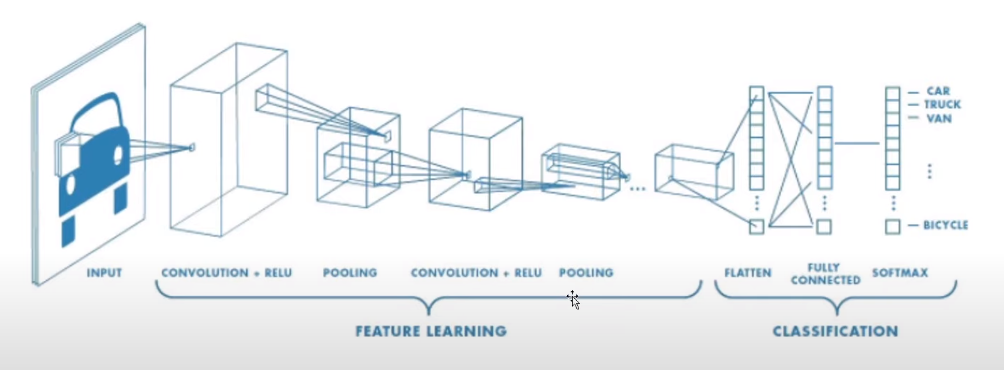

In [18]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [19]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 8
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/8
14/14 [==============================] - 8s 333ms/step - loss: 2.6168 - accuracy: 0.1606 - val_loss: 6.9131 - val_accuracy: 0.1000
Epoch 2/8
14/14 [==============================] - 6s 253ms/step - loss: 2.2094 - accuracy: 0.2195 - val_loss: 4.4819 - val_accuracy: 0.1364
Epoch 3/8
14/14 [==============================] - 6s 254ms/step - loss: 2.0802 - accuracy: 0.2172 - val_loss: 2.3219 - val_accuracy: 0.2727
Epoch 4/8
14/14 [==============================] - 6s 253ms/step - loss: 2.0753 - accuracy: 0.2489 - val_loss: 2.1826 - val_accuracy: 0.2091
Epoch 5/8
14/14 [==============================] - 6s 255ms/step - loss: 1.9581 - accuracy: 0.2489 - val_loss: 2.2857 - val_accuracy: 0.1455
Epoch 6/8
14/14 [==============================] - 6s 254ms/step - loss: 1.8471 - accuracy: 0.2760 - val_loss: 2.0566 - val_accuracy: 0.2364
Epoch 7/8
14/14 [==============================] - 7s 252ms/step - loss: 1.7221 - accuracy: 0.3620 - val_loss: 1.9757 - val_accuracy: 0.1909
Epoch 8/8
14/

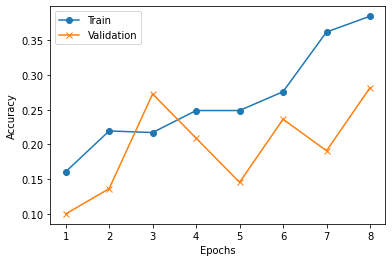

In [20]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

In [21]:
y_pred = np.argmax(model.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 111ms/step


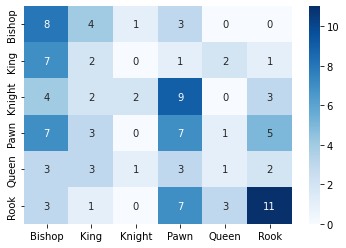

In [22]:
conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)